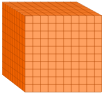

In [1]:
# Importing Image class from PIL module
from PIL import Image
 
# Opens a image in RGB mode
im = Image.open(r"data/train_fill_in_blank/train_fill_in_blank/4029/image.png")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
# left = 0
# top = 0
# right = 105
# bottom = 95

#100
left = 0
top = 40
right = 105
bottom = 134

# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
# im1.save("data/icon/orage_100.png")
im1

In [2]:
from datasets import load_dataset
dataset = load_dataset("json", data_files="data/train.jsonl", split="train")

In [3]:
crop = []
# questions = [item for item in dataset["question"] if "What number is shown?" in item]
for data in dataset:
    if "What number is shown?" == data["question"]:
        crop.append(data)

In [4]:
########### Augmentaion ###############
import os
from os import listdir

def read_icon(path):
    result = {}
    for it in listdir(path):
        id = it.replace("image_", "")
        id = id.replace(".png", "")
        if ".png" not in it:
            continue
        result.update({id: Image.open(os.path.join(path, it)).convert("L")})
    return result   
x00_img = read_icon(os.path.abspath("data/icon/10x/"))
x0_img = read_icon(os.path.abspath("data/icon/1x/"))
x_img = read_icon(os.path.abspath("data/icon/x/"))

In [5]:
x00_img

{'2': <PIL.Image.Image image mode=L size=518x188>,
 '8': <PIL.Image.Image image mode=L size=302x347>,
 '1': <PIL.Image.Image image mode=L size=115x97>,
 '6': <PIL.Image.Image image mode=L size=117x97>,
 '7': <PIL.Image.Image image mode=L size=110x113>,
 '5': <PIL.Image.Image image mode=L size=108x91>,
 '4': <PIL.Image.Image image mode=L size=110x76>,
 '3': <PIL.Image.Image image mode=L size=112x97>,
 '9': <PIL.Image.Image image mode=L size=692x897>}

In [6]:
from PIL import Image
blank = Image.open('data/icon/blank2.png').convert("L")
blank_v = Image.open('data/icon/blank_v.png').convert("L")
flatten = Image.open('data/icon/flatten.png').convert("L")
im1 = Image.open('data/icon/green100.png').convert("L")

x00_img = read_icon(os.path.abspath("data/icon/10x/"))
x0_img = read_icon(os.path.abspath("data/icon/1x/"))
x_img = read_icon(os.path.abspath("data/icon/x/"))

def get_concat_h_multi_resize(im_list, resample=Image.BICUBIC):
    min_height = min(im.height for im in im_list)
    im_list_resize = [im.resize((int(im.width * min_height / im.height), min_height),resample=resample)
                      for im in im_list]
    total_width = sum(im.width for im in im_list_resize)
    dst = Image.new('RGB', (total_width, min_height))
    pos_x = 0
    for im in im_list_resize:
        dst.paste(im, (pos_x, 0))
        pos_x += im.width
    return dst

def get_concat_v_multi_resize(im_list, resample=Image.BICUBIC):
    min_width = min(im.width for im in im_list)
    im_list_resize = [im.resize((min_width, int(im.height * min_width / im.width)),resample=resample)
                      for im in im_list]
    total_height = sum(im.height for im in im_list_resize)
    dst = Image.new('RGB', (min_width, total_height))
    pos_y = 0
    for im in im_list_resize:
        dst.paste(im, (0, pos_y))
        pos_y += im.height
    return dst

row1 = get_concat_h_multi_resize([im1, blank, x00_img["1"], blank, x0_img["3"], blank, x_img["6"]])
row2 = get_concat_h_multi_resize([x_img["6"], flatten, flatten, flatten])
get_concat_v_multi_resize([row1, row2]).save('data/test.png')

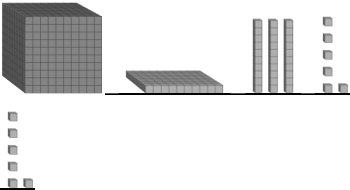

In [7]:
Image.open('data/test.png')

In [25]:
import json

with open('./data/train.jsonl', 'r') as json_file:
    json_list = list(json_file)

training_data = []
for json_str in json_list:
    data = json.loads(json_str)
    training_data.append(data)


In [26]:
len(training_data)

14549

In [31]:
text_format = {
  "question": "What number is shown?",
  "answer": None,
  "ques_type": "fill_in_blank",
  "grade": None,
  "label": None
}

In [57]:
number_img = 2000
x_img

{'2': <PIL.Image.Image image mode=L size=30x117>,
 '8': <PIL.Image.Image image mode=L size=41x86>,
 '1': <PIL.Image.Image image mode=L size=21x99>,
 '6': <PIL.Image.Image image mode=L size=36x97>,
 '7': <PIL.Image.Image image mode=L size=29x80>,
 '5': <PIL.Image.Image image mode=L size=30x117>,
 '4': <PIL.Image.Image image mode=L size=30x117>,
 '3': <PIL.Image.Image image mode=L size=23x63>,
 '9': <PIL.Image.Image image mode=L size=144x402>}

In [79]:
import json
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import ujson
if os.path.exists("data/train_full.jsonl"):
  os.remove("data/train_full.jsonl")
f = open("data/train_full.jsonl", "w+", encoding="utf-8")
for line in training_data:
    f.write(ujson.dumps(line, escape_forward_slashes=False).strip()+"\n")

number_img = 9999

for k in range(1, number_img):
    id = "aug"+str(k)
    path = "/home/congnguyen/drive/AdvancedML/VQA/data/augmentation/"+id
    if not os.path.exists(path):
       os.makedirs(path)
    text_format["answer"] = str(k)
    text_format["pid"]=str(id)
    # print(text_format)
    f.write(ujson.dumps(text_format, escape_forward_slashes=False).strip()+"\n")
    training_data.append(text_format)
    out_file = open(path+"/data.json", "w") 
    json.dump(text_format, out_file, indent = 1) 
    out_file.close() 
    x1000 = int(k/1000)
    x100 = int((k%1000)/100)
    x10 = int((k%100)/10)
    x1 = int(k%10)
    full_img = []
    for i in range(x1000):
        full_img.append("x1000")
    full_img.append("hundred-"+str(x100))
    full_img.append("ten-"+str(x10))
    full_img.append(x1)
    batch_v1 = []
    batch_v2 = []
    for i in full_img:
        if i == 0: continue
        if len(batch_v1) < 6 :
            batch_v1.append(i)
        else:
            batch_v2.append(i)
    aug_batch1 = []
    aug_batch2 = []
    # print(batch_v1)
    for i in batch_v1:
        if i == "x1000":
            aug_batch1.append(im1)
        elif "hundred" in str(i):
            re = i.split("-")[-1]
            if int(re) == 0: continue
            else: aug_batch1.append(x00_img[str(re)])
        elif "ten" in str(i):
            re = i.split("-")[-1]
            if int(re) == 0: continue
            else: 
                aug_batch1.append(x0_img[str(re)])
        else:
            if int(i) == 0: continue
            else: aug_batch1.append(x_img[str(i)])
        aug_batch1.append(blank)
    
    if len(batch_v2) != 0:
        for i in batch_v2:
            if i == "x1000":
                aug_batch2.append(im1)
            elif "hundred" in str(i):
                re = i.split("-")[-1]
                if int(re) == 0: continue
                else: aug_batch2.append(x00_img[str(re)])
            elif "ten" in str(i):
                re = i.split("-")[-1]
                if int(re) == 0: continue
                else: aug_batch2.append(x0_img[str(re)])
            else:
                if int(i) == 0: continue
                else: aug_batch2.append(x_img[str(i)])
            aug_batch2.append(blank)
        while len(aug_batch2) < 11:
            aug_batch2.append(flatten)
            aug_batch2.append(blank)
    if len(aug_batch2) == 0:
        # print(k)
        # print(aug_batch1)
        aug_batch1.pop()
        get_concat_h_multi_resize(aug_batch1).save(path+'/image.png')
    else:
        # print(aug_batch1)
        # print(aug_batch2)
        aug_batch1.pop()
        aug_batch2.pop()
        row1 = get_concat_h_multi_resize(aug_batch1)
        row2 = get_concat_h_multi_resize(aug_batch2)
        get_concat_v_multi_resize([row1, row2]).save(path+'/image.png')
    image = cv2.imread(path+'/image.png') 
    kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]])
    # sharpened_image = sr.upsample(sharpened_image)
    sharpened_image = cv2.pyrUp(image)
    sharpened_image = cv2.filter2D(sharpened_image, -1, kernel) 
    # resized_image = cv2.resize(sharpened_image, (384, 384)) 
    
    cv2.imwrite(path+'/image.png', sharpened_image)

f.close()

In [44]:
import json
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import ujson
if os.path.exists("data/train_full.jsonl"):
  os.remove("data/train_full.jsonl")
f = open("data/train_full.jsonl", "w+", encoding="utf-8")
for line in training_data:
    f.write(ujson.dumps(line, escape_forward_slashes=False).strip()+"\n")
    
number_img = 100
for i in range(1, number_img):
    id = "aug"+str(i)
    path = "/home/congnguyen/drive/AdvancedML/VQA/data/augmentation/"+id
    if not os.path.exists(path):
       os.makedirs(path)
    text_format["answer"] = str(i)
    text_format["pid"]=str(id)
    # print(text_format)
    f.write(ujson.dumps(text_format, escape_forward_slashes=False).strip()+"\n")
    training_data.append(text_format)
    out_file = open(path+"/data.json", "w") 
    json.dump(text_format, out_file, indent = 1) 
    out_file.close() 
    if i < 10:
        get_concat_h_multi_resize([x_img[str(i)]]).save(path+'/image.png')
        
    elif i < 100:
        x10 = int(i/10)
        x1 = int(i%10)
        if x1 == 0:
            get_concat_h_multi_resize([x0_img[str(x10)]]).save(path+'/image.png')
        else:
            get_concat_h_multi_resize([x0_img[str(x10)],  blank, x_img[str(x1)]]).save(path+'/image.png')
            # print([x0_img[str(x10)],  blank, x_img[str(x1)]])
    elif i < 1000:
        x100 = int(i/100)
        x10 = int((i%100)/10)
        x1 = int(i%10)
        if x1 == 0:
            if x10 == 0:
                get_concat_h_multi_resize([x00_img[str(x100)]]).save(path+'/image.png')
            else:
                get_concat_h_multi_resize([x00_img[str(x100)],  blank, x0_img[str(x10)]]).save(path+'/image.png')
        elif x10 == 0:
            get_concat_h_multi_resize([x00_img[str(x100)],  blank, x_img[str(x1)]]).save(path+'/image.png')
        else:
            get_concat_h_multi_resize([x00_img[str(x100)], blank, x0_img[str(x10)],  blank, x_img[str(x1)]]).save(path+'/image.png')
    else:
        x1000 = int(i/1000)
        x100 = int((i%1000)/100)
        x10 = int((i%100)/10)
        x1 = int(i%10)
        if x1 == 0:
            if x10 == 0:
                if x100 == 0:
                    get_concat_h_multi_resize([im1]).save(path+'/image.png')
                else:
                    get_concat_h_multi_resize([im1, blank, x00_img[str(x100)]]).save(path+'/image.png')
            else:
                if x100 == 0:
                    get_concat_h_multi_resize([im1, blank, x0_img[str(x10)]]).save(path+'/image.png')
                else:
                    get_concat_h_multi_resize([im1, blank, x00_img[str(x100)], blank, x0_img[str(x10)]]).save(path+'/image.png')
        else:
            if x10 == 0:
                if x100 == 0:
                    get_concat_h_multi_resize([im1, blank, x_img[str(x1)]]).save(path+'/image.png')
                else:
                    get_concat_h_multi_resize([im1, blank, x00_img[str(x100)], blank, x_img[str(x1)]]).save(path+'/image.png')
            else:
                if x100 == 0:
                    get_concat_h_multi_resize([im1, blank, x0_img[str(x10)], blank, x_img[str(x1)]]).save(path+'/image.png')
                else:
                    get_concat_h_multi_resize([im1, blank, x00_img[str(x100)], blank, x0_img[str(x10)], blank, x_img[str(x1)]]).save(path+'/image.png')
    image = cv2.imread(path+'/image.png') 
    kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]])
    # sharpened_image = sr.upsample(sharpened_image)
    sharpened_image = cv2.pyrUp(image)
    sharpened_image = cv2.filter2D(sharpened_image, -1, kernel) 
    # resized_image = cv2.resize(sharpened_image, (384, 384)) 
    
    cv2.imwrite(path+'/image.png', sharpened_image)

f.close()

[<PIL.Image.Image image mode=L size=12x79 at 0x7F45588AC400>, <PIL.Image.Image image mode=L size=17x115 at 0x7F4609286050>, <PIL.Image.Image image mode=L size=21x99 at 0x7F45588AC1F0>]
[<PIL.Image.Image image mode=L size=12x79 at 0x7F45588AC400>, <PIL.Image.Image image mode=L size=17x115 at 0x7F4609286050>, <PIL.Image.Image image mode=L size=30x117 at 0x7F45588AC2B0>]
[<PIL.Image.Image image mode=L size=12x79 at 0x7F45588AC400>, <PIL.Image.Image image mode=L size=17x115 at 0x7F4609286050>, <PIL.Image.Image image mode=L size=23x63 at 0x7F45588AC160>]
[<PIL.Image.Image image mode=L size=12x79 at 0x7F45588AC400>, <PIL.Image.Image image mode=L size=17x115 at 0x7F4609286050>, <PIL.Image.Image image mode=L size=30x117 at 0x7F45588AC190>]
[<PIL.Image.Image image mode=L size=12x79 at 0x7F45588AC400>, <PIL.Image.Image image mode=L size=17x115 at 0x7F4609286050>, <PIL.Image.Image image mode=L size=30x117 at 0x7F45588AC1C0>]
[<PIL.Image.Image image mode=L size=12x79 at 0x7F45588AC400>, <PIL.Image